In [ ]:
import numpy as np
import pandas as pd

In [ ]:
house_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_data.csv')

In [ ]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
house_data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16613 entries, 0 to 16612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16613 non-null  float64
 1   bedrooms       16613 non-null  int64  
 2   bathrooms      16613 non-null  float64
 3   sqft_living    16613 non-null  int64  
 4   sqft_lot       16613 non-null  int64  
 5   floors         16613 non-null  float64
 6   waterfront     16613 non-null  int64  
 7   view           16613 non-null  int64  
 8   condition      16613 non-null  int64  
 9   grade          16613 non-null  int64  
 10  sqft_above     16613 non-null  int64  
 11  sqft_basement  16613 non-null  int64  
 12  yr_built       16613 non-null  int64  
 13  yr_renovated   16613 non-null  int64  
 14  zipcode        16613 non-null  int64  
 15  lat            16613 non-null  float64
 16  long           16613 non-null  float64
 17  sqft_living15  16613 non-null  int64  
 18  sqft_l

In [ ]:
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.661300e+04,16613.000000,16613.000000,16613.000000,1.661300e+04,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000
mean,5.335161e+05,3.365918,2.062090,2053.860531,1.573761e+04,1.432553,0.007946,0.244026,3.449708,7.592608,1750.210859,303.649672,1967.297418,89.855234,98078.162283,47.560026,-122.215380,1974.793776,13287.334256
std,3.665165e+05,0.937185,0.758786,904.438391,4.195449e+04,0.509669,0.088786,0.781695,0.666582,1.168420,804.771068,450.701536,27.936716,413.846846,54.152178,0.139708,0.138657,673.022438,27456.421787
min,7.500000e+04,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,660.000000
25%,3.150000e+05,3.000000,1.500000,1414.000000,5.454000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98033.000000,47.464600,-122.327000,1490.000000,5421.000000
50%,4.470000e+05,3.000000,2.000000,1900.000000,7.902000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573000,-122.231000,1830.000000,7823.000000
75%,6.387000e+05,4.000000,2.500000,2500.000000,1.107000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2140.000000,600.000000,1990.000000,0.000000,98118.000000,47.679000,-122.127000,2330.000000,10327.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,871200.000000


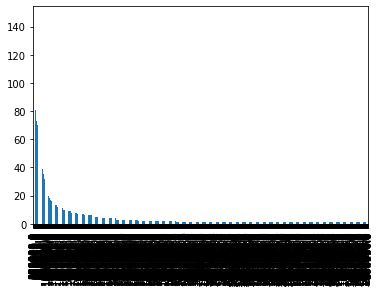

In [ ]:
house_data.price.value_counts().plot(kind='bar')    

In [ ]:
house_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
col_name = house_data.drop('price', axis = 1).columns[:]
x = house_data.loc[:, col_name]
y = house_data['price']
x = pd.DataFrame(data = min_max_scaler.fit_transform(x), columns = col_name)

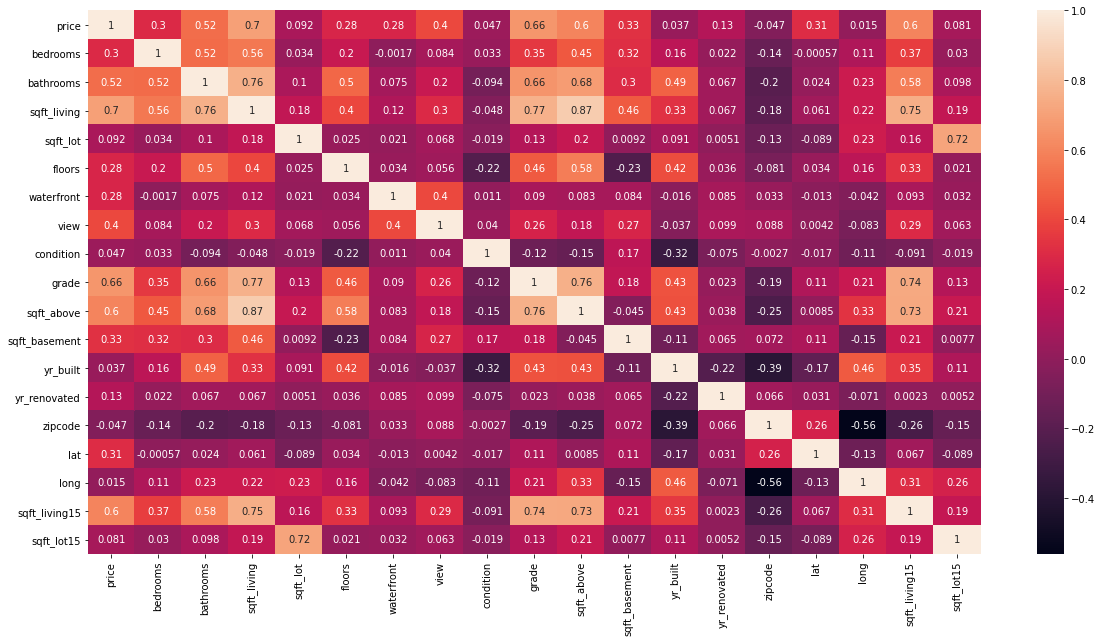

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 10))
sns.heatmap(house_data.corr(), annot = True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
features = house_data.drop('price', axis = 1)
target = house_data['price']
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size = 0.2, random_state = 1)
print("Train features shape : ", train_features.shape)
print("Train target shape   : ", train_target.shape)
print("Test features shape  : ", test_features.shape)
print("Test target shape    : ", test_target.shape)

Train features shape :  (13290, 18)
Train target shape   :  (13290,)
Test features shape  :  (3323, 18)
Test target shape    :  (3323,)


In [ ]:
model = LinearRegression(normalize = True)
model.fit(train_features, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
# Model evaluation for training set
train_target_pred = model.predict(train_features)
rmse = (np.sqrt(mean_squared_error(train_target, train_target_pred)))
r2 = r2_score(train_target, train_target_pred)

# Examine the first 10 predicted output from the model
output = pd.DataFrame(train_target[0:10])
output['Predicted'] = train_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Model evaluation for testing set
test_target_pred = model.predict(test_features)
rmse = (np.sqrt(mean_squared_error(test_target, test_target_pred)))
r2 = r2_score(test_target, test_target_pred)

output = pd.DataFrame(test_target[0:10])
output['Predicted'] = test_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model testing performance:")
print("--------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

           price      Predicted     Difference
4834    430000.0  398164.698914  -31835.301086
4567    599000.0  495384.357228 -103615.642772
12309   270000.0  369718.671479   99718.671479
2128    235000.0  150963.255743  -84036.744257
924     451000.0  559115.021111  108115.021111
15795   315000.0  469775.796459  154775.796459
3050    517000.0  362552.264175 -154447.735825
9541    825000.0  794480.169936  -30519.830064
44      309000.0  156577.264750 -152422.735250
11874  1400000.0  871151.104890 -528848.895110 

Model training performance:
---------------------------
RMSE is 198095.1210775298
R2 score is 0.6978317762321282


          price      Predicted     Difference
16050  399000.0  403444.275604    4444.275604
7202   500000.0  820599.461540  320599.461540
321    520000.0  516273.270009   -3726.729991
11958  315000.0  313388.241253   -1611.758747
11418  474000.0  590606.583779  116606.583779
5363   307000.0  400980.991009   93980.991009
13873  390000.0  550149.624542  160149.62454

In [ ]:
X = house_data.drop('price', axis = 1)
y = house_data.price

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
# Model evaluation for training set
train_target_pred = regressor.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, train_target_pred)))
r2 = r2_score(y_train, train_target_pred)

# Examine the first 10 predicted output from the model
output = pd.DataFrame(y_train[0:10])
output['Predicted'] = train_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")
# Model evaluation for testing set
test_target_pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, test_target_pred)))
r2 = r2_score(y_test, test_target_pred)

output = pd.DataFrame(y_test[0:10])
output['Predicted'] = test_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model testing performance:")
print("--------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

           price  Predicted  Difference
274     331000.0   331000.0         0.0
2449   1600000.0  1600000.0         0.0
3634    550000.0   550000.0         0.0
3429    475000.0   475000.0         0.0
9270    585000.0   585000.0         0.0
1147    510000.0   510000.0         0.0
4816    475000.0   475000.0         0.0
4649    415900.0   415900.0         0.0
5828    455000.0   455000.0         0.0
11727  1280000.0  1280000.0         0.0 

Model training performance:
---------------------------
RMSE is 10658.203932695133
R2 score is 0.999124345566096


           price  Predicted  Difference
12396   943500.0   770000.0   -173500.0
13614   310000.0   360000.0     50000.0
14772   807500.0   805000.0     -2500.0
8142    875000.0   835000.0    -40000.0
10605   549995.0   403000.0   -146995.0
7536   1320000.0   670000.0   -650000.0
5364    404000.0   410000.0      6000.0
1799    465000.0   675000.0    210000.0
6778   1255000.0  1256500.0      1500.0
11165   850000.0   728935.0   -121065.0 

M

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
# Model evaluation for training set
train_target_pred = regressor.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, train_target_pred)))
r2 = r2_score(y_train, train_target_pred)

# Examine the first 10 predicted output from the model
output = pd.DataFrame(y_train[0:10])
output['Predicted'] = train_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")
# Model evaluation for testing set
test_target_pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, test_target_pred)))
r2 = r2_score(y_test, test_target_pred)

output = pd.DataFrame(y_test[0:10])
output['Predicted'] = test_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model testing performance:")
print("--------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

           price     Predicted     Difference
274     331000.0  4.653782e+05  134378.238209
2449   1600000.0  1.165596e+06 -434404.401015
3634    550000.0  6.574484e+05  107448.433649
3429    475000.0  4.653782e+05   -9621.761791
9270    585000.0  7.826442e+05  197644.245134
1147    510000.0  6.574484e+05  147448.433649
4816    475000.0  6.574484e+05  182448.433649
4649    415900.0  2.687634e+05 -147136.645701
5828    455000.0  7.826442e+05  327644.245134
11727  1280000.0  1.165596e+06 -114404.401015 

Model training performance:
---------------------------
RMSE is 219602.74851126948
R2 score is 0.6282591887370732


           price  Predicted  Difference
12396   943500.0   770000.0   -173500.0
13614   310000.0   360000.0     50000.0
14772   807500.0   805000.0     -2500.0
8142    875000.0   835000.0    -40000.0
10605   549995.0   403000.0   -146995.0
7536   1320000.0   670000.0   -650000.0
5364    404000.0   410000.0      6000.0
1799    465000.0   675000.0    210000.0
6778   1255000.0

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)
from sklearn.metrics import mean_absolute_error
test_target_pred = model.predict(X_test)
mean_absolute_error(y_test, test_target_pred)

119545.67378874512

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=42)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import mean_absolute_error
test_target_pred = model.predict(X_test)
mean_absolute_error(y_test, test_target_pred)

119545.67378874512

In [ ]:
# Model evaluation for testing set
test_target_pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, test_target_pred)))
r2 = r2_score(y_test, test_target_pred)

output = pd.DataFrame(y_test[0:10])
output['Predicted'] = test_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model testing performance:")
print("--------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

           price  Predicted  Difference
12396   943500.0   770000.0   -173500.0
13614   310000.0   360000.0     50000.0
14772   807500.0   805000.0     -2500.0
8142    875000.0   835000.0    -40000.0
10605   549995.0   403000.0   -146995.0
7536   1320000.0   670000.0   -650000.0
5364    404000.0   410000.0      6000.0
1799    465000.0   675000.0    210000.0
6778   1255000.0  1256500.0      1500.0
11165   850000.0   728935.0   -121065.0 

Model testing performance:
--------------------------
RMSE is 226775.74218921864
R2 score is 0.6629084223809276


In [ ]:
print("Root Mean Squared Error: ",mean_squared_error(y_test, test_target_pred, squared=False))

Root Mean Squared Error:  226775.74218921864


In [ ]:
liver_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/liver_patient_new_quiz_2_3.csv')

In [ ]:
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         500 non-null    int64  
 1   Gender                      500 non-null    object 
 2   Total_Bilirubin             500 non-null    float64
 3   Direct_Bilirubin            500 non-null    float64
 4   Alkaline_Phosphotase        500 non-null    int64  
 5   Alamine_Aminotransferase    500 non-null    int64  
 6   Aspartate_Aminotransferase  500 non-null    int64  
 7   Total_Protiens              500 non-null    float64
 8   Albumin                     500 non-null    float64
 9   Albumin_and_Globulin_Ratio  496 non-null    float64
 10  Liver_Problem               500 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 43.1+ KB


In [ ]:
liver_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver_Problem                 0
dtype: int64

In [ ]:
liver_data = pd.get_dummies(liver_data, columns = ['Gender'])

In [ ]:
liver_data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [ ]:
liver_data['Albumin_and_Globulin_Ratio'] = liver_data['Albumin_and_Globulin_Ratio'].fillna(liver_data['Albumin_and_Globulin_Ratio'].mean())

In [ ]:
liver_data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [ ]:
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         500 non-null    int64  
 1   Total_Bilirubin             500 non-null    float64
 2   Direct_Bilirubin            500 non-null    float64
 3   Alkaline_Phosphotase        500 non-null    int64  
 4   Alamine_Aminotransferase    500 non-null    int64  
 5   Aspartate_Aminotransferase  500 non-null    int64  
 6   Total_Protiens              500 non-null    float64
 7   Albumin                     500 non-null    float64
 8   Albumin_and_Globulin_Ratio  500 non-null    float64
 9   Liver_Problem               500 non-null    int64  
 10  Gender_Female               500 non-null    uint8  
 11  Gender_Male                 500 non-null    uint8  
dtypes: float64(5), int64(5), uint8(2)
memory usage: 40.2 KB


In [ ]:
liver_data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem,Gender_Female,Gender_Male
count,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,44.5860,2.603800,1.117200,296.372000,82.736000,108.820000,6.44480,3.168800,0.960907,0.700000,0.256000,0.744000
std,16.5334,5.120238,2.066709,257.461676,194.366775,307.093557,1.08902,0.799741,0.293107,0.458717,0.436859,0.436859
min,4.0000,0.400000,0.100000,63.000000,10.000000,10.000000,2.70000,0.900000,0.300000,0.000000,0.000000,0.000000
25%,32.7500,0.800000,0.200000,175.000000,23.000000,24.750000,5.70000,2.600000,0.800000,0.000000,0.000000,0.000000
50%,45.0000,0.900000,0.300000,205.500000,33.500000,40.000000,6.50000,3.100000,1.000000,1.000000,0.000000,1.000000
75%,58.0000,2.200000,1.000000,298.000000,59.250000,79.250000,7.20000,3.800000,1.100000,1.000000,1.000000,1.000000
max,85.0000,75.000000,14.200000,2110.000000,2000.000000,4929.000000,9.60000,5.500000,1.900000,1.000000,1.000000,1.000000


In [ ]:
X = liver_data.drop(['Liver_Problem'], axis = 1)
y = liver_data['Liver_Problem']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 1)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.74

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.9041095890410958

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Specificity with recall pos label=0: ",recall_score(y_test, y_pred, pos_label=0))

Specificity with recall pos label=0:  0.5185185185185185


In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.8169014084507042

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Specificity with recall pos label=0: ",recall_score(y_test, y_pred, pos_label=0))
from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_test, y_pred))

Specificity with recall pos label=0:  0.5185185185185185
F1 Score:  0.8055555555555557


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6565195332318621

In [ ]:
# 1: 0.6978
# 2: 0.9991
# 3: 219602.74
# 4: 0.662908
# 5: 119545.6737
# 6: mean_absolute_error = 119545.673; R2 = 0.662908; RMSE = 226775.74218
# 7: VOIDED
# 8: Accuracy=0.74; Recall=0.9041
# 9: TNR Specificity=0.51851
# 10: Precision=0.8169014
# 11: F1=0.80555
# 12: roc_auc=0.656519